#**0. Preparation and Setup**

In [ ]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)


#Reading in the data as adult dataframe
autism = pd.read_csv("https://raw.githubusercontent.com/rupreti77/upreti_IT533/main/csv_result-Autism-Adult-Data.csv")

#Verifying that we can see the data
autism.head()

Current TensorFlow version is 2.8.0


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
aut4=autism 
aut4.ethnicity.replace('?','unknown', inplace=True)
aut4.relation.replace('?','unknown', inplace=True)
aut4

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,unknown,no,no,Russia,no,7,18 and more,unknown,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
aut5=aut4
nan_value = float("NaN")
aut5.replace("?", nan_value, inplace=True)
aut5.dropna(inplace=True)
aut5["age"] = pd.to_numeric(aut5["age"], downcast="float")
aut5.age.describe()
aut5

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,unknown,no,no,Egypt,no,2,18 and more,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,unknown,no,no,Russia,no,7,18 and more,unknown,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
#Let's drop the value of the age which is equal to 383 at the line 52
aut5.loc[aut5['age']==383]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,53,1,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1,18 and more,Self,NO


In [ ]:
aut5=aut5.drop(52)

In [ ]:
aut5.age.describe()

count    701.000000
mean      29.194008
std        9.711530
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

#Selection of the dependent variable in the dataset

In [ ]:
aut5.contry_of_res.replace(['United States','Canada', 'Mexico'],'North_America', inplace=True)
aut5.contry_of_res.replace(['Argentina','Brazil','Bahamas', 'Chile','Costa Rica','Nicaragua','Uruguay','Ecuador','Bolivia','Aruba'],'South_America', inplace=True)
aut5.contry_of_res.replace(['Egypt','Burundi', 'United Kingdom','South Africa','Sierra Leone', 'Ethiopia','Niger','Angola'],'Africa', inplace=True)
aut5.contry_of_res.replace(['Afghanistan','Jordan','Bangladesh','China','India','Lebanon','Philippines','Hong Kong', 'Japan', 'Sri Lanka','Iraq','Viet Nam', 'Malaysia', 'Nepal', 'Indonesia','Turkey','Iran','Saudi Arabia','Azerbaijan','Pakistan','Kazakhstan','Oman','United Arab Emirates'],'Asia', inplace=True)
aut5.contry_of_res.replace([ 'Austria','Spain', 'Ireland', 'United Kingdom','Italy','France','Netherlands', 'Romania', 
                            'Sweden','Germany','Russia','Armenia','Iceland','Ukraine','Serbia', 'Portugal','Belgium',
                            'Finland', 'Czech Republic', 'Cyprus'],'Europe', inplace=True)
aut5.contry_of_res.replace(['New Zealand','Australia', 'Tonga', 'AmericanSamoa',],'Oceania', inplace=True)
aut5.contry_of_res.unique()

array(['North_America', 'South_America', 'Europe', 'Africa', 'Oceania',
       'Asia'], dtype=object)

In [ ]:
aut5.columns = aut5.columns.str.replace('/', '')
aut5
aut5.jundice.replace(('yes', 'no'), (1, 0), inplace=True)
aut5.austim.replace(('yes', 'no'), (1, 0), inplace=True)
aut5.gender.replace (('m', 'f'), (1, 0), inplace=True)
aut5.ClassASD.replace(('YES', 'NO'), (1, 0), inplace=True)
aut6= aut5[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','jundice','austim','gender' ,'result','contry_of_res']]
aut6

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,austim,gender,result,contry_of_res
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,6,North_America
1,1,1,0,1,0,0,0,1,0,1,24.0,0,1,1,5,South_America
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,8,Europe
3,1,1,0,1,0,0,1,1,0,1,35.0,0,1,0,6,North_America
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,2,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,0,0,7,Europe
700,1,0,0,0,0,0,0,1,0,1,34.0,0,0,1,3,North_America
701,1,0,1,1,1,0,1,1,0,1,24.0,0,0,0,7,Europe
702,1,0,0,1,1,0,1,0,1,1,35.0,0,0,1,6,Asia


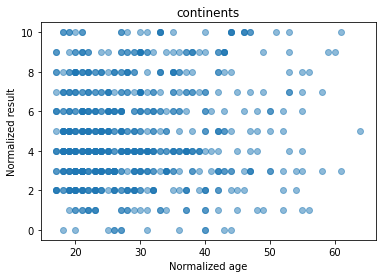

In [ ]:
# Let's build a simple scatter plot
import matplotlib.pyplot as plt
plt.scatter(aut6['age'], aut6['result'], alpha=0.5)
plt.title('continents')
plt.xlabel('Normalized age') 
plt.ylabel('Normalized result')
plt.show()   

In [ ]:
aut6.describe(include = "all")

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,austim,gender,result,contry_of_res
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279
mean,0.723252,0.453638,0.459344,0.497860,0.499287,0.285307,0.417974,0.651926,0.325250,0.574893,29.194008,0.098431,0.129815,0.522111,4.888730,NaN
std,0.447710,0.498201,0.498700,0.500352,0.500357,0.451883,0.493578,0.476700,0.468803,0.494712,9.711530,0.298109,0.336339,0.499868,2.495516,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,3.000000,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1.000000,4.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.000000,7.000000,NaN


#CLUSTURING


# **1. Exploratory Data Analysis (EDA)**

# **2. Preprocessing**

In [ ]:
aut7 = aut6[['contry_of_res', 'age', 'result', 'austim', 'gender']].copy()

In [ ]:
#Let's choose our important attributes
aut7

,contry_of_res,age,result,austim,gender
0,North_America,26.0,6,0,0
1,South_America,24.0,5,1,1
2,Europe,27.0,8,1,1
3,North_America,35.0,6,1,0
4,Africa,40.0,2,0,0
...,...,...,...,...,...
699,Europe,25.0,7,0,0
700,North_America,34.0,3,0,1
701,Europe,24.0,7,0,0
702,Asia,35.0,6,0,1


In [ ]:
aut7.dtypes

contry_of_res     object
age              float32
result             int64
austim             int64
gender             int64
dtype: object

In [ ]:
# Splitting into Training and Test Set
train_dataset = aut7.sample(frac=0.8, random_state=0)
test_dataset = aut7.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('contry_of_res')
test_labels = test_features.pop('contry_of_res')

In [ ]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['contry_of_res'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['contry_of_res'], prefix='', prefix_sep='')
# Normalizing the input variables
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
normalizer.adapt(np.array(test_features))

In [ ]:
train_labels1.head() # Let's see what the training labels look like encoded

,Africa,Asia,Europe,North_America,Oceania,South_America
459,0,0,0,0,0,1
678,0,0,0,1,0,0
623,0,0,0,0,1,0
493,0,0,0,1,0,0
218,0,1,0,0,0,0


In [ ]:
# define the Keras model

#The model expects rows of data with 4 variables (the input_dim=4 argument)
#The first hidden layer has 12 nodes and uses the relu activation function.
#The second hidden layer has 8 nodes and uses the relu activation function.
#The output layer has six nodes and uses the Softmax activation function.

model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the Keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the Keras model on the dataset
model.fit(train_features, train_labels1, epochs=150, batch_size=10)

Epoch 1/150
57/57 [==============================] - 2s 5ms/step - loss: 7.9608 - accuracy: 0.0749
Epoch 2/150
57/57 [==============================] - 0s 6ms/step - loss: 2.2212 - accuracy: 0.0410
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 1.8759 - accuracy: 0.0980
Epoch 4/150
57/57 [==============================] - 0s 6ms/step - loss: 1.7626 - accuracy: 0.2870
Epoch 5/150
57/57 [==============================] - 0s 4ms/step - loss: 1.7016 - accuracy: 0.4064
Epoch 6/150
57/57 [==============================] - 0s 4ms/step - loss: 1.6666 - accuracy: 0.4029
Epoch 7/150
57/57 [==============================] - 0s 4ms/step - loss: 1.6383 - accuracy: 0.3975
Epoch 8/150
57/57 [==============================] - 0s 4ms/step - loss: 1.6152 - accuracy: 0.4118
Epoch 9/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6063 - accuracy: 0.4029
Epoch 10/150
57/57 [==============================] - 0s 4ms/step - loss: 1.5980 - accuracy: 0.4029
Epoch 11/

In [ ]:
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

5/5 [==============================] - 0s 6ms/step - loss: 1.4605 - accuracy: 0.4286
Accuracy: 42.86


In [ ]:
test_labels1

,Africa,Asia,Europe,North_America,Oceania,South_America
9,0,0,0,0,0,1
11,1,0,0,0,0,0
19,0,1,0,0,0,0
23,0,1,0,0,0,0
28,0,0,0,0,1,0
...,...,...,...,...,...,...
680,1,0,0,0,0,0
685,0,0,1,0,0,0
687,0,0,0,1,0,0
693,1,0,0,0,0,0


In [ ]:
predictions = (model.predict(test_features)>0.5).astype("int32")
predictions

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

Citation:

Khaine Joshua HowardJoshua Howard, ScottScott 3 ِAbdalrahman M. AmerِAbdalrahman M. Amer (1965, August 1). Multilabel-indicator is not supported for confusion matrix. Stack Overflow. Retrieved April 7, 2022, from https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test_labels1.values.argmax(axis=1), predictions.argmax(axis=1))

print(cf_matrix)

[[12  2  0  0  0  0]
 [23 30  0  0  0  0]
 [12  5  0  1  0  0]
 [21  1  0  1  0  0]
 [16 14  0  0  0  0]
 [ 2  0  0  0  0  0]]


[Text(0, 0.5, 'Africa'),
 Text(0, 1.5, 'Asia'),
 Text(0, 2.5, 'Europe'),
 Text(0, 3.5, 'NA'),
 Text(0, 4.5, 'Oceania'),
 Text(0, 5.5, 'SA')]

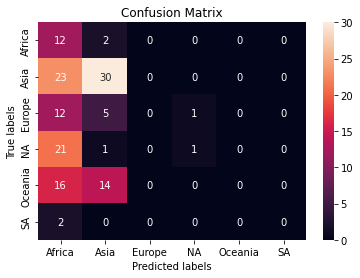

In [ ]:
import seaborn as sns
T5_lables = ['Africa', 	'Asia', 	'Europe', 	'NA', 	'Oceania', 	'SA']    
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables)



**Citation**


Greig FoddGreig Fodd,  M.Nuramzan IftariM.Nuramzan Iftari                    2013, Quantum Prophet, Abhinand Venkataramanan SundaresanVenkataramanan Sundaresan (1969, June 1). Keras attributeerror: 'sequential' object has no attribute 'predict_classes'. Stack Overflow. Retrieved April 7, 2022, from https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
import time
target_names = ['Africa', 	'Asia', 	'Europe', 	'North_America', 	'Oceania', 	'South_America']
print(classification_report(test_labels1, predictions, target_names=target_names))


               precision    recall  f1-score   support

       Africa       0.00      0.00      0.00        14
         Asia       0.58      0.57      0.57        53
       Europe       0.00      0.00      0.00        18
North_America       0.50      0.04      0.08        23
      Oceania       0.00      0.00      0.00        30
South_America       0.00      0.00      0.00         2

    micro avg       0.57      0.22      0.32       140
    macro avg       0.18      0.10      0.11       140
 weighted avg       0.30      0.22      0.23       140
  samples avg       0.22      0.22      0.22       140

